Punto 1

Inciso a

In [1]:
import sympy as sp
import numpy as np
import time

# Definición simbólica
x = sp.Symbol('x')
f_expr = sp.exp(-x) - x # type: ignore
f1_expr = sp.diff(f_expr, x)
f2_expr = sp.diff(f1_expr, x)

# Conversión a funciones numéricas
f = sp.lambdify(x, f_expr, 'numpy')
f1 = sp.lambdify(x, f1_expr, 'numpy')
f2 = sp.lambdify(x, f2_expr, 'numpy')

historial = []  # Para guardar pasos del método

def metodo_taylor_segundo_orden(x0, tol=1e-6, max_iter=50):
    print("Método de búsqueda de raíces por serie de Taylor (2da derivada incluida)\n")
    for n in range(max_iter):
        fx = f(x0)
        f1x = f1(x0)
        f2x = f2(x0)
        
        # Criterio de parada adicional: valor de la función suficientemente pequeño
        if abs(fx) < tol:
            print(f"Convergencia alcanzada por criterio de función (|f(x)| < {tol})")
            print(f"Raíz aproximada: {x0}")
            return x0
        
        discriminante = f1x**2 - 2*fx*f2x
        
        print(f"Iteración {n}:")
        print(f"  x_n = {x0}")
        print(f"  f(x_n) = {fx}")
        print(f"  f'(x_n) = {f1x}")
        print(f"  f''(x_n) = {f2x}")
        print(f"  Discriminante = {discriminante}")
        
        if discriminante < 0:
            print("  ¡Discriminante negativo! Raíces complejas. Se detiene el método.")
            return None
        
        # Manejo de caso especial: segunda derivada cero (revertir a Newton)
        if abs(f2x) < 1e-12:  # Usamos un umbral pequeño para evitar división por cero
            print("  ¡Segunda derivada cercana a cero! Revertiendo a método de Newton.")
            delta = -fx / f1x
        else:
            sqrt_disc = np.sqrt(discriminante)
            delta1 = (-f1x + sqrt_disc) / f2x
            delta2 = (-f1x - sqrt_disc) / f2x
            delta = delta1 if abs(delta1) < abs(delta2) else delta2
        
        x1 = x0 + delta
        
        error = abs(x1 - x0)
        print(f"  Δx elegido = {delta}")
        print(f"  x_{n+1} = {x1}")
        print(f"  Error = {error}\n")
                
        historial.append({
            'n': n,
            'x': x0,
            'f': fx,
            'f1': f1x,
            'f2': f2x,
            'disc': discriminante,
            'delta': delta,
            'x_next': x1,
            'error': error
        })

        if error < tol:
            print(f"Convergencia alcanzada en {n+1} iteraciones. Raíz aproximada: {x1}")
            return x1

        x0 = x1
    
    print("No se alcanzó la convergencia en el número máximo de iteraciones.")
    return None

# Medición de tiempo del método Taylor
start_taylor = time.perf_counter()
raiz_taylor = metodo_taylor_segundo_orden(x0=1.5)
end_taylor = time.perf_counter()
tiempo_taylor = end_taylor - start_taylor

Método de búsqueda de raíces por serie de Taylor (2da derivada incluida)

Iteración 0:
  x_n = 1.5
  f(x_n) = -1.27686983985157
  f'(x_n) = -1.22313016014843
  f''(x_n) = 0.22313016014842982
  Discriminante = 2.0658637323742854
  Δx elegido = -0.9598932100397927
  x_1 = 0.5401067899602073
  Error = 0.9598932100397927

Iteración 1:
  x_n = 0.5401067899602073
  f(x_n) = 0.042579234073840566
  f'(x_n) = -1.582686024034048
  f''(x_n) = 0.5826860240340479
  Discriminante = 2.4552744014549
  Δx elegido = 0.027037717070153885
  x_2 = 0.5671445070303612
  Error = 0.0270377170701539

Iteración 2:
  x_n = 0.5671445070303612
  f(x_n) = -1.906618355085321e-06
  f'(x_n) = -1.5671426004120061
  f''(x_n) = 0.5671426004120061
  Discriminante = 2.4559380926750887
  Δx elegido = -1.2166205772858244e-06
  x_3 = 0.567143290409784
  Error = 1.2166205772823346e-06

Convergencia alcanzada por criterio de función (|f(x)| < 1e-06)
Raíz aproximada: 0.567143290409784


Gráfico de la función 𝑓(𝑥) y puntos iterativos

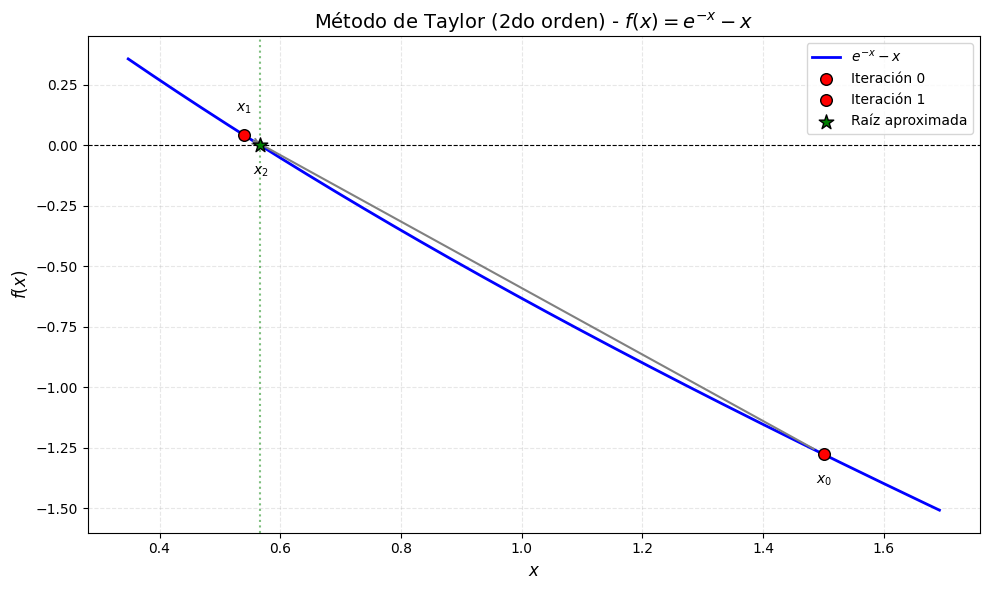

In [2]:
import matplotlib.pyplot as plt

def graficar_iteraciones(historial, f, funcion_str="f(x)"):
    # Extraer datos del historial
    xs = [step['x'] for step in historial]
    ys = [step['f'] for step in historial]  # Usamos valores ya calculados
    
    # Configurar rango de visualización
    margin = 0.2 * (max(xs) - min(xs)) if len(xs) > 1 else 0.5
    x_min = min(xs) - margin
    x_max = max(xs) + margin
    x_vals = np.linspace(x_min, x_max, 400)
    y_vals = f(x_vals)
    
    # Crear figura única (quitamos el subplot del error)
    plt.figure(figsize=(10, 6))
    
    # Graficar función y línea cero
    plt.plot(x_vals, y_vals, label=f'${funcion_str}$', color='blue', linewidth=2)
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    
    # Graficar iteraciones
    for i, (xi, yi) in enumerate(zip(xs, ys)):
        color = 'red' if i < len(xs)-1 else 'green'
        marker = 'o' if i < len(xs)-1 else '*'
        size = 70 if i < len(xs)-1 else 120
        label = f'Iteración {i}' if i < len(xs)-1 else 'Raíz aproximada'
        
        plt.scatter(xi, yi, color=color, s=size, edgecolors='black', 
                   zorder=5, label=label, marker=marker)
        plt.text(xi, yi + 0.08*np.sign(yi), f'$x_{i}$', 
                fontsize=10, ha='center', va='bottom' if yi > 0 else 'top')
        
        # Flechas entre iteraciones
        if i < len(xs) - 1:
            plt.annotate('', xy=(xs[i+1], ys[i+1]), xytext=(xi, yi),
                       arrowprops=dict(arrowstyle='->', color='gray', 
                                     lw=1.5, shrinkA=8, shrinkB=8))

    # Línea vertical en la raíz final
    plt.axvline(xs[-1], color='green', linestyle=':', alpha=0.5)
    
    # Configuración del gráfico
    plt.title(f'Método de Taylor (2do orden) - $f(x) = {funcion_str}$', fontsize=14)
    plt.xlabel('$x$', fontsize=12)
    plt.ylabel('$f(x)$', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

graficar_iteraciones(historial, f, "e^{-x} - x")

Gráfico del error en función de las iteraciones (log-log)

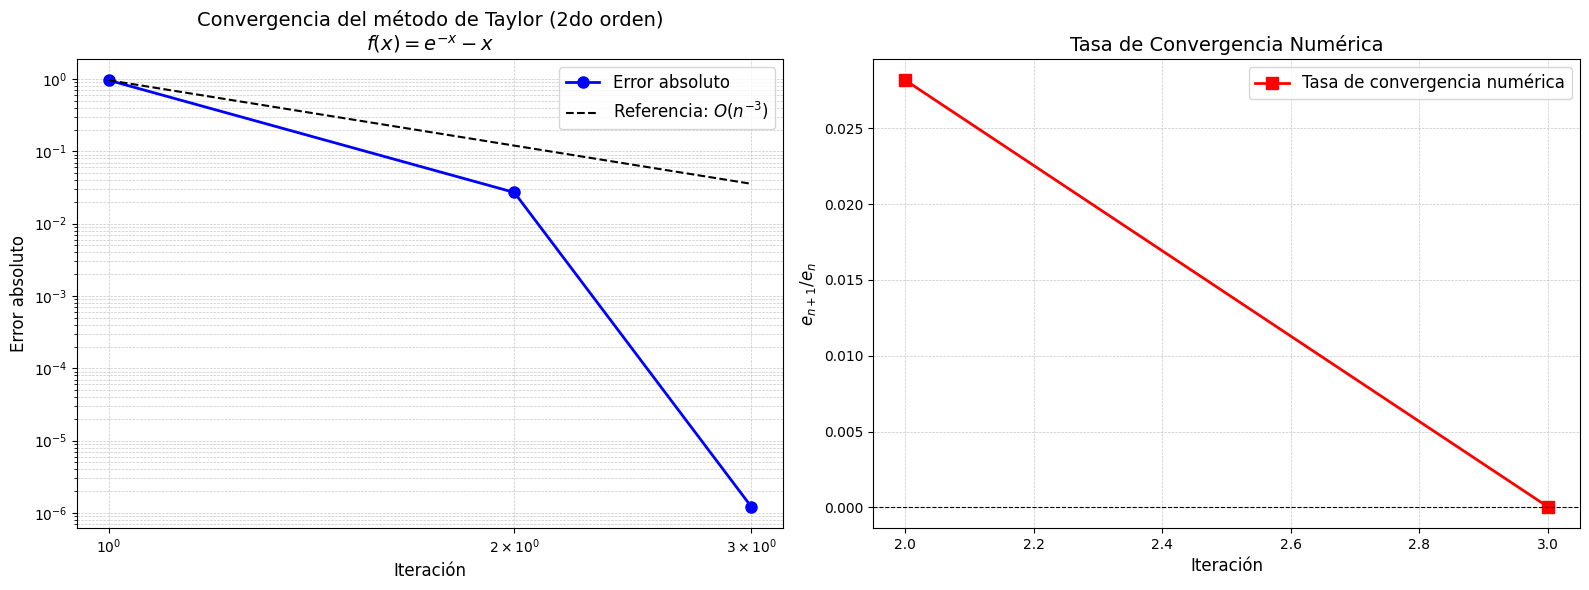


--- Análisis de Convergencia ---
Iteraciones totales: 3

Tasas de convergencia numéricas (e_n+1/e_n):
Iteración 1-2: 0.028167
Iteración 2-3: 0.000045

Orden estimado de convergencia:
Usando iteraciones 1-3: 2.8039


In [3]:
def graficar_convergencia(historial, funcion_str="f(x)"):
    # Extraer errores válidos (positivos)
    errors = [step['error'] for step in historial if step['error'] > 0]
    iterations = np.arange(1, len(errors) + 1, dtype=float)
    
    # Crear figura con dos subplots para análisis detallado
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # --- Gráfico 1: Convergencia log-log ---
    p_ref = 3  # Orden teórico esperado para Taylor con 2da derivada
    C = errors[0] * (iterations[0] ** p_ref)
    ref_curve = C * iterations**(-p_ref)
    
    ax1.loglog(iterations, errors, marker='o', linestyle='-', 
              color='blue', linewidth=2, markersize=8, 
              label='Error absoluto')
    ax1.loglog(iterations, ref_curve, 'k--', 
              label=f'Referencia: $O(n^{{-{p_ref}}})$')
    
    ax1.set_title(f'Convergencia del método de Taylor (2do orden)\n$f(x) = {funcion_str}$', fontsize=14)
    ax1.set_xlabel('Iteración', fontsize=12)
    ax1.set_ylabel('Error absoluto', fontsize=12)
    ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    ax1.set_xticks(iterations)
    ax1.legend(fontsize=12)
    
    # --- Gráfico 2: Tasa de convergencia numérica ---
    if len(errors) > 2:
        ratios = np.array(errors[1:]) / np.array(errors[:-1])
        ax2.plot(iterations[1:], ratios, 's-', color='red', 
                markersize=8, linewidth=2, 
                label='Tasa de convergencia numérica')
        ax2.axhline(y=0, color='k', linestyle='--', linewidth=0.8)
        ax2.set_title('Tasa de Convergencia Numérica', fontsize=14)
        ax2.set_xlabel('Iteración', fontsize=12)
        ax2.set_ylabel('$e_{n+1}/e_n$', fontsize=12)
        ax2.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
        ax2.legend(fontsize=12)
    
    plt.tight_layout()
    plt.show()

# Función para mostrar resumen numérico
def mostrar_resumen_convergencia(historial):
    errors = [step['error'] for step in historial if step['error'] > 0]
    if len(errors) < 2:
        return
    
    print("\n--- Análisis de Convergencia ---")
    print(f"Iteraciones totales: {len(errors)}")
    
    # Calcular tasas numéricas
    ratios = np.array(errors[1:]) / np.array(errors[:-1])
    print(f"\nTasas de convergencia numéricas (e_n+1/e_n):")
    for i, r in enumerate(ratios, 1):
        print(f"Iteración {i}-{i+1}: {r:.6f}")
    
    # Estimación del orden de convergencia
    if len(errors) > 2:
        orders = np.log(np.array(errors[2:])/np.array(errors[1:-1])) / np.log(np.array(errors[1:-1])/np.array(errors[:-2]))
        print(f"\nOrden estimado de convergencia:")
        for i, p in enumerate(orders, 2):
            print(f"Usando iteraciones {i-1}-{i+1}: {p:.4f}")

# Llamar a las funciones
graficar_convergencia(historial, "e^{-x} - x")
mostrar_resumen_convergencia(historial)

Diagrama de Taylor local 

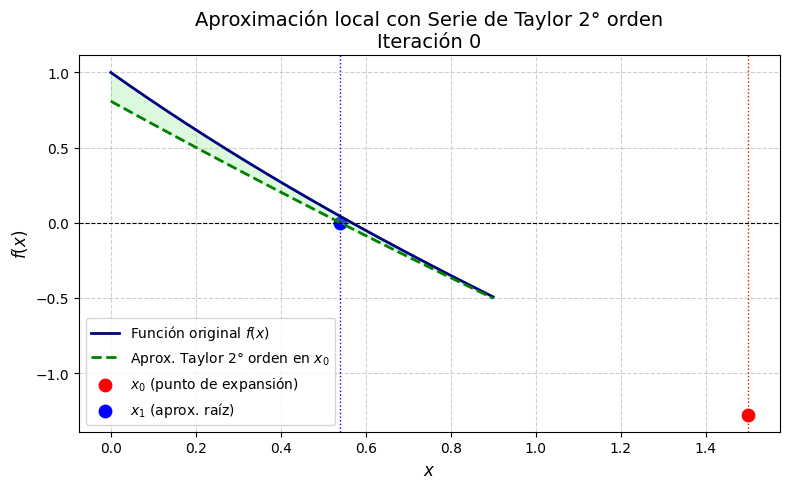

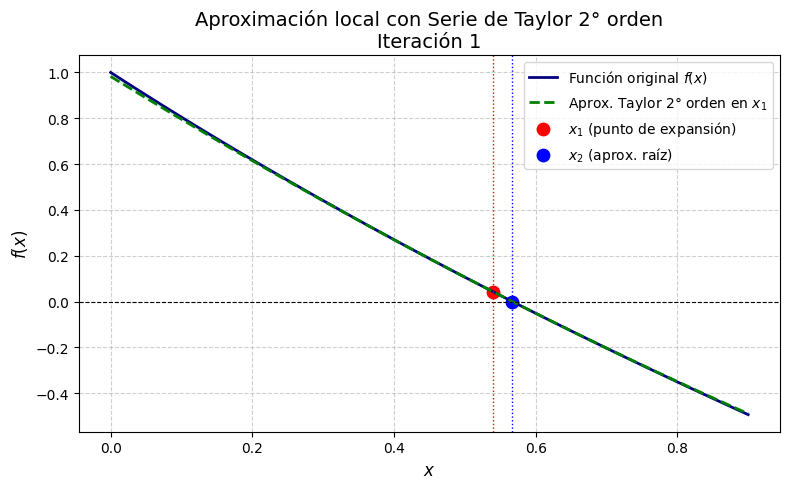

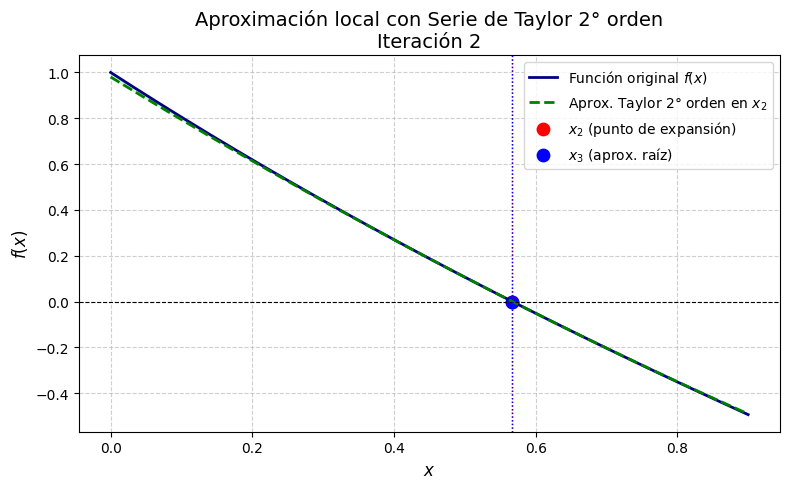

In [4]:
delta = 0.3  # Rango local para graficar

for i in range(3):
    step = historial[i]
    xn = step['x']
    fxn = step['f']
    f1n = step['f1']
    f2n = step['f2']
    xn_next = step['x_next']

    def taylor2(x):
        return fxn + f1n*(x - xn) + 0.5*f2n*(x - xn)**2

    x_local = np.linspace(0, 0.9, 300) 
    # x_local = np.linspace(xn - delta, xn + delta, 300)
    y_original = f(x_local)
    y_taylor = taylor2(x_local)

    plt.figure(figsize=(8, 5))
    plt.plot(x_local, y_original, label='Función original $f(x)$', color='navy', linewidth=2)
    plt.plot(x_local, y_taylor, label=f'Aprox. Taylor 2° orden en $x_{{{i}}}$', color='green', linestyle='--', linewidth=2)
    plt.scatter([xn], [fxn], color='red', s=80, label=f'$x_{{{i}}}$ (punto de expansión)')
    plt.scatter([xn_next], [0], color='blue', s=80, label=f'$x_{{{i+1}}}$ (aprox. raíz)')
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.axvline(xn, color='red', linestyle=':', linewidth=1)
    plt.axvline(xn_next, color='blue', linestyle=':', linewidth=1)
    plt.fill_between(x_local, y_original, y_taylor, color='lightgreen', alpha=0.3)
    plt.title(f'Aproximación local con Serie de Taylor 2° orden\nIteración {i}', fontsize=14)
    plt.xlabel('$x$', fontsize=12)
    plt.ylabel('$f(x)$', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


Inciso b

In [5]:
# Definición simbólica y función f
x = sp.Symbol('x')
f_expr = sp.exp(-x) - x  # type: ignore
f1_expr = sp.diff(f_expr, x)
f2_expr = sp.diff(f1_expr, x)
f = sp.lambdify(x, f_expr, 'numpy')
f1 = sp.lambdify(x, f1_expr, 'numpy')
f2 = sp.lambdify(x, f2_expr, 'numpy')

def metodo_combinado(a, b, tol=1e-6, max_iter=100):
    print(f"Inicio método combinado Taylor 2do orden + Bisección en [{a}, {b}]")
    
    fa = f(a)
    fb = f(b)
    
    if fa * fb > 0:
        print("No se cumple la condición de Bolzano: f(a)*f(b) debe ser negativo.")
        return None, []
    
    historial = []
    for n in range(max_iter):
        x0 = (a + b) / 2
        fx0 = f(x0)
        f1x0 = f1(x0)
        f2x0 = f2(x0)
        
        print(f"\nIteración {n}:")
        print(f"  Intervalo actual: [{a:.6f}, {b:.6f}]")
        print(f"  Punto medio x0 = {x0:.6f}")
        print(f"  f(x0) = {fx0:.6e}")
        print(f"  f'(x0) = {f1x0:.6e}")
        print(f"  f''(x0) = {f2x0:.6e}")
        
        discriminante = f1x0**2 - 2 * fx0 * f2x0
        usar_taylor = True
        
        if discriminante < 0:
            print("  Discriminante negativo -> no se puede usar Taylor.")
            usar_taylor = False
        if abs(f2x0) < 1e-12:
            print("  Segunda derivada muy cercana a cero -> no se puede usar Taylor.")
            usar_taylor = False
        
        if usar_taylor:
            sqrt_disc = np.sqrt(discriminante)
            delta1 = (-f1x0 + sqrt_disc) / f2x0
            delta2 = (-f1x0 - sqrt_disc) / f2x0
            delta = delta1 if abs(delta1) < abs(delta2) else delta2
            x_taylor = x0 + delta
            
            if not (a <= x_taylor <= b):
                print(f"  Aproximación Taylor {x_taylor:.6f} fuera del intervalo -> no se usa Taylor.")
                usar_taylor = False
            else:
                print(f"  Método Taylor seleccionado, Δx = {delta:.6e}, x_new = {x_taylor:.6f}")
        
        if not usar_taylor:
            x_new = (a + b) / 2
            print(f"  Método Bisección seleccionado, x_new = {x_new:.6f}")
        else:
            x_new = x_taylor # type: ignore
        
        fx_new = f(x_new)
        
        if fa * fx_new < 0:
            b = x_new
            fb = fx_new
        else:
            a = x_new
            fa = fx_new
        
        error = abs(b - a)
        print(f"  Nuevo intervalo: [{a:.6f}, {b:.6f}], error = {error:.6e}")
        
        historial.append({
            'iter': n,
            'x': x_new,
            'f_x': fx_new,
            'error': error,
            'metodo': 'Taylor' if usar_taylor else 'Bisección'
        })
        
        # ✅ Nuevo criterio doble
        if error < tol:
            print(f"\n✔ Convergencia por reducción del intervalo en {n+1} iteraciones. Raíz aprox: {x_new:.8f}")
            return x_new, historial
        if abs(fx_new) < tol:
            print(f"\n✔ Convergencia por valor de f(x) ≈ 0 en {n+1} iteraciones. Raíz aprox: {x_new:.8f}")
            return x_new, historial

    print("\n⚠ No se alcanzó convergencia en el máximo de iteraciones.")
    return None, historial

# Definimos valores de entrada comunes
a, b = 0, 2
x0 = (a + b) / 2 # Punto inicial para el método de Taylor puro

# Medimos tiempo del método de Taylor (inciso a)
start_taylor = time.perf_counter()
raiz_taylor = metodo_taylor_segundo_orden(x0)
end_taylor = time.perf_counter()

# Medimos tiempo del método combinado (inciso b)
start_combinado = time.perf_counter()
raiz_combinado, historial_combinado = metodo_combinado(a, b)
end_combinado = time.perf_counter()

# Tiempos
tiempo_taylor = end_taylor - start_taylor
tiempo_combinado = end_combinado - start_combinado

# Resultados
print("\n========== COMPARACIÓN DE MÉTODOS ==========")
print(f"Raíz (Taylor puro)     : {raiz_taylor}")
print(f"Raíz (Método combinado): {raiz_combinado}")
print(f"Tiempo Taylor puro     : {tiempo_taylor:.6f} segundos")
print(f"Tiempo combinado       : {tiempo_combinado:.6f} segundos")

# Comentario final
if tiempo_taylor < tiempo_combinado:
    print("\n✅ El método de Taylor puro fue más rápido.")
elif tiempo_combinado < tiempo_taylor:
    print("\n✅ El método combinado fue más rápido.")
else:
    print("\n⚖ Ambos métodos tardaron aproximadamente lo mismo.")


Método de búsqueda de raíces por serie de Taylor (2da derivada incluida)

Iteración 0:
  x_n = 1.0
  f(x_n) = -0.6321205588285577
  f'(x_n) = -1.3678794411714423
  f''(x_n) = 0.36787944117144233
  Discriminante = 2.3361824814491565
  Δx elegido = -0.43649655465200016
  x_1 = 0.5635034453479999
  Error = 0.4364965546520001

Iteración 1:
  x_n = 0.5635034453479999
  f(x_n) = 0.005707920220046181
  f'(x_n) = -1.5692113655680462
  f''(x_n) = 0.5692113655680461
  Discriminante = 2.4559262837019205
  Δx elegido = 0.003639847978326228
  x_2 = 0.5671432933263262
  Error = 0.0036398479783262827

Convergencia alcanzada por criterio de función (|f(x)| < 1e-06)
Raíz aproximada: 0.5671432933263262
Inicio método combinado Taylor 2do orden + Bisección en [0, 2]

Iteración 0:
  Intervalo actual: [0.000000, 2.000000]
  Punto medio x0 = 1.000000
  f(x0) = -6.321206e-01
  f'(x0) = -1.367879e+00
  f''(x0) = 3.678794e-01
  Método Taylor seleccionado, Δx = -4.364966e-01, x_new = 0.563503
  Nuevo intervalo: 

Gráfica comparativa  

Iteraciones Taylor: 5
Iteraciones Combinado: 13
x0: 1.0
a, b: 0 2
f(x0): -0.6321205588285577


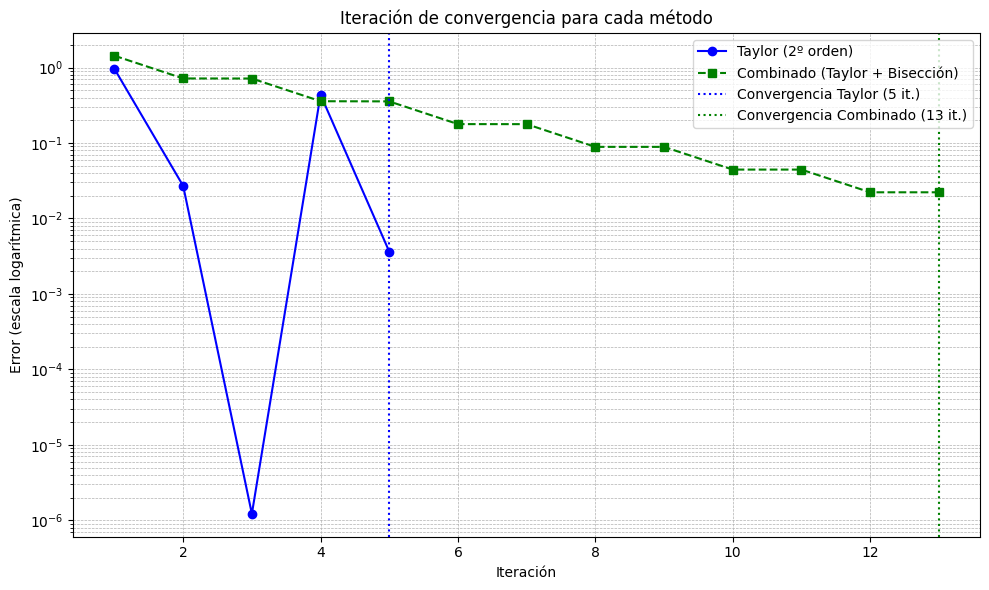

In [6]:
# Error por iteración
errores_taylor = [step['error'] for step in historial]
errores_combinado = [step['error'] for step in historial_combinado]

# Iteraciones
iter_taylor = list(range(1, len(errores_taylor) + 1))
iter_combinado = list(range(1, len(errores_combinado) + 1))

# Última iteración (convergencia)
ultima_taylor = iter_taylor[-1]
ultima_combinado = iter_combinado[-1]

print("Iteraciones Taylor:", len(historial))
print("Iteraciones Combinado:", len(historial_combinado))
print("x0:", x0)
print("a, b:", a, b)
# print("tol:", tol)
print("f(x0):", f(x0))  # para ver cómo empieza el método



# Graficamos
plt.figure(figsize=(10, 6))
plt.semilogy(iter_taylor, errores_taylor, 'o-', label='Taylor (2º orden)', color='blue')
plt.semilogy(iter_combinado, errores_combinado, 's--', label='Combinado (Taylor + Bisección)', color='green')

# Líneas verticales de convergencia
plt.axvline(x=ultima_taylor, color='blue', linestyle=':', label=f'Convergencia Taylor ({ultima_taylor} it.)')
plt.axvline(x=ultima_combinado, color='green', linestyle=':', label=f'Convergencia Combinado ({ultima_combinado} it.)')

plt.title("Iteración de convergencia para cada método")
plt.xlabel("Iteración")
plt.ylabel("Error (escala logarítmica)")
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


Punto 2. Aplicación a un sistema de gases


Gráfica comparativa comportamiento gas ideal vs. dióxido de carbono para presentar la problematica.
Fuera de inciso.

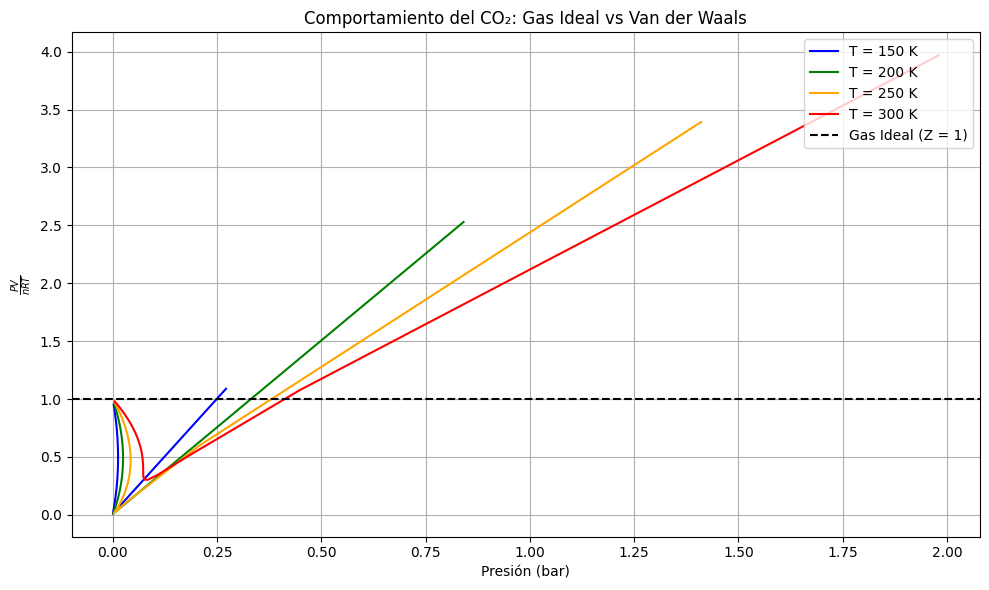

In [7]:
# Constantes físicas
R = 8.314  # J/(mol·K)

# Constantes de Van der Waals para el CO₂
a = 3.592  # L²·bar/mol²
b = 0.0427  # L/mol

# Conversión: 1 L·bar = 100 J
a = a * 100  # en J·L/mol²

# Temperaturas (K)
temperaturas = [150, 200, 250, 300]
colores = ['blue', 'green', 'orange', 'red']

# Rango de presiones en bar
P = np.linspace(0.1, 100, 500)  # bar
P_Pa = P * 1e5  # en Pascales

# Número de moles y volumen molar
n = 1  # mol
Vm = np.linspace(0.05, 5, 500)  # Volumen molar en L/mol

# Figura
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar curvas de Van der Waals
for T, color in zip(temperaturas, colores):
    P_vdw = (n * R * T) / (Vm - b) - a / Vm**2  # presión en Pa
    Z_vdw = (P_vdw * Vm) / (n * R * T)  # factor de compresibilidad

    # Filtrar valores físicos
    mask = (Vm > b) & (P_vdw > 0) & (Z_vdw > 0)
    ax.plot(P_vdw[mask] / 1e5, Z_vdw[mask], label=f"T = {T} K", color=color)

# Línea horizontal para gas ideal
ax.axhline(1, color='black', linestyle='dashed', label='Gas Ideal (Z = 1)')

# Etiquetas
ax.set_xlabel("Presión (bar)")
ax.set_ylabel(r"$\frac{PV}{nRT}$")
ax.set_title("Comportamiento del CO₂: Gas Ideal vs Van der Waals")

# Leyenda
ax.legend(loc='upper right')

# Ajustes
plt.grid(True)
plt.tight_layout()
plt.show()


Estamos graficando el factor de compresibilidad del CO₂:

Z= PV/nRT
​ 
en función de la presión, a distintas temperaturas.

🔍 ¿Qué es Z?
Si el gas se comportara como ideal, tendríamos

𝑍 = 1

Pero los gases reales no cumplen exactamente la ley de los gases ideales, especialmente a bajas temperaturas o altas presiones.

El valor de Z indica qué tan lejos está el gas del comportamiento ideal:

𝑍 < 1: el gas es más compresible que un gas ideal → predominan las fuerzas atractivas.

𝑍 > 1: el gas es menos compresible → predominan las repulsiones entre moléculas.

C:\Users\Diego\AppData\Local\Temp\ipykernel_13796\3516588532.py:20: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  Vm_sol, = fsolve(f, Vm_inicial) #type: ignore
C:\Users\Diego\AppData\Local\Temp\ipykernel_13796\3516588532.py:20: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last five Jacobian evaluations.
  Vm_sol, = fsolve(f, Vm_inicial) #type: ignore


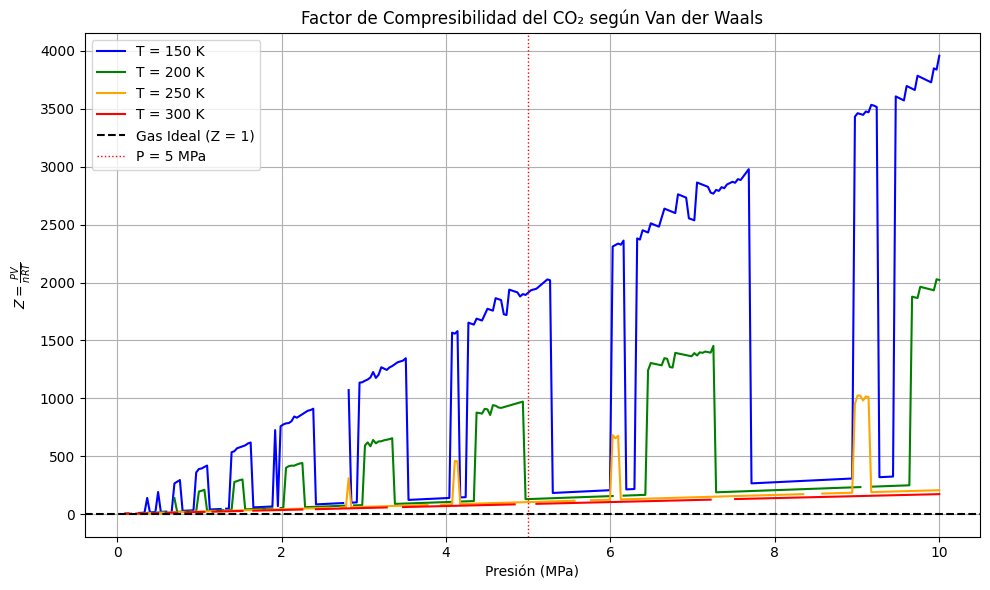

In [8]:
from scipy.optimize import fsolve

n = 1  # mol

# Presiones en MPa → las pasamos a Pa al usar en ecuaciones
P_MPa = np.linspace(0.1, 10, 300)  # de 0.1 a 10 MPa
P_Pa = P_MPa * 1e6  # en Pascales


# Figura
fig, ax = plt.subplots(figsize=(10, 6))

# Función para resolver la ecuación de Van der Waals y obtener Vm
def resolver_vm(P, T):
    # Ecuación: P = RT / (Vm - b) - a / Vm^2
    # La pasamos a la forma f(Vm) = 0
    def f(Vm):
        return (R * T) / (Vm - b) - a / Vm**2 - P
    Vm_inicial = R * T / P  # estimación inicial desde gas ideal
    Vm_sol, = fsolve(f, Vm_inicial) #type: ignore
    return Vm_sol if Vm_sol > b else np.nan  # descartar resultados no físicos

# Graficar Z en función de P para cada T
for T, color in zip(temperaturas, colores):
    Z_list = []
    for P in P_Pa:
        try:
            Vm = resolver_vm(P, T)
            Z = (P * Vm) / (R * T)
        except:
            Z = np.nan
        Z_list.append(Z)
    ax.plot(P_Pa / 1e6, Z_list, label=f"T = {T} K", color=color)

# Línea horizontal Z = 1 (gas ideal)
ax.axhline(1, color='black', linestyle='dashed', label='Gas Ideal (Z = 1)')

# Línea vertical en 5 MPa
ax.axvline(5, color='red', linestyle='dotted', linewidth=1, label='P = 5 MPa')

# Etiquetas
ax.set_xlabel("Presión (MPa)")
ax.set_ylabel(r"$Z = \frac{PV}{nRT}$")
ax.set_title("Factor de Compresibilidad del CO₂ según Van der Waals")
ax.legend(loc='upper left')
ax.grid(True)
plt.tight_layout()
plt.show()



RESULTADOS:

--- Presión: 5.0 MPa ---
Volumen ideal: 3.325600e-04 m³/mol
Volumen real (Van der Waals): 4.270001e-05 m³/mol
Diferencia relativa: 678.83%

--- Presión: 0.5 MPa ---
Volumen ideal: 3.325600e-03 m³/mol
Volumen real (Van der Waals): 4.270001e-05 m³/mol
Diferencia relativa: 7688.29%


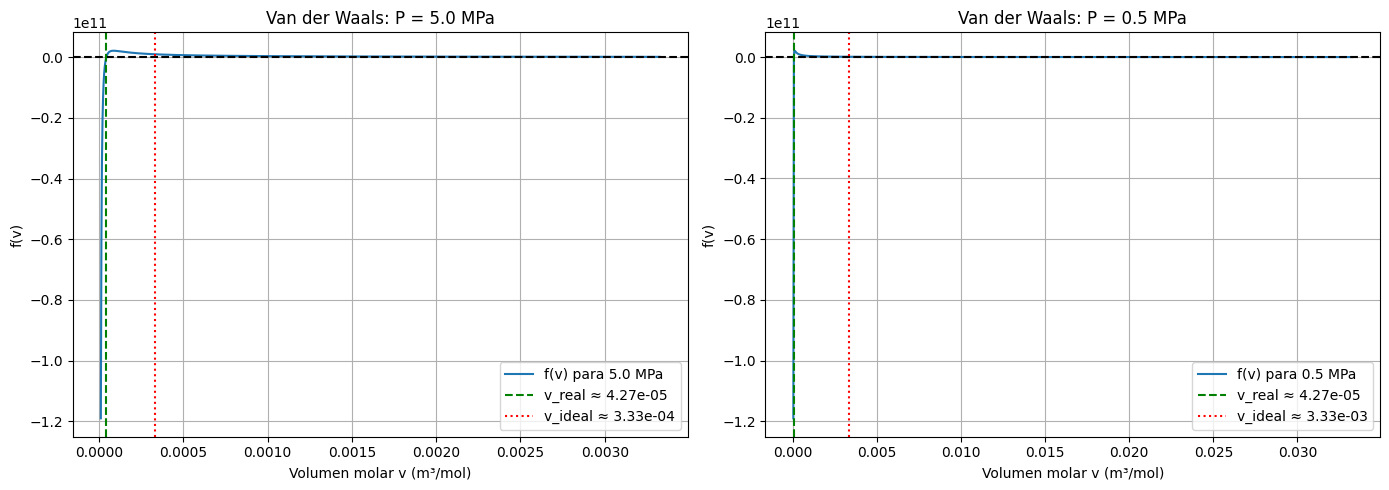

In [14]:
from scipy.optimize import brentq


# Constantes físicas
R = 8.314  # J/(mol·K)
T = 200.0  # K
a = 0.364e6  # Pa·m^6/mol^2
b = 4.27e-5  # m³/mol

# Presiones a analizar (en Pascales)
pressures = [5e6, 0.5e6]

# Ecuación de Van der Waals
def van_der_waals_eq(v, P, T):
    return (P + a / v**2) * (v - b) - R * T

# Buscar intervalo con cambio de signo
def encontrar_intervalo(P, T, v_min=1e-5, v_max=1e-1, pasos=10000):
    v_vals = np.linspace(v_min, v_max, pasos)
    f_vals = [van_der_waals_eq(v, P, T) for v in v_vals]

    for i in range(len(f_vals) - 1):
        if f_vals[i] * f_vals[i + 1] < 0:
            return v_vals[i], v_vals[i + 1]
    return None, None  # No hay cambio de signo

# Resultados
results = []

for P in pressures:
    v_ideal = R * T / P

    a_i, b_i = encontrar_intervalo(P, T)

    if a_i is not None:
        try:
            v_real = brentq(van_der_waals_eq, a_i, b_i, args=(P, T))
        except Exception as e:
            print(f"Error al aplicar brentq: {e}")
            v_real = None
    else:
        v_real = None

    results.append((P, v_ideal, v_real))

# Mostrar resultados
print("\nRESULTADOS:")
for P, v_ideal, v_real in results:
    print(f"\n--- Presión: {P/1e6:.1f} MPa ---")
    print(f"Volumen ideal: {v_ideal:.6e} m³/mol")
    if v_real:
        print(f"Volumen real (Van der Waals): {v_real:.6e} m³/mol")
        print(f"Diferencia relativa: {abs(v_real - v_ideal)/v_real*100:.2f}%")
    else:
        print("❌ No se pudo encontrar volumen real (fallo de convergencia o sin raíz en el rango)")

# Gráficos
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

for i, (P, v_ideal, v_real) in enumerate(results):
    ax = axs[i]

    v_vals = np.linspace(1e-5, v_ideal * 10, 1000)
    f_vals = [van_der_waals_eq(v, P, T) for v in v_vals]

    ax.plot(v_vals, f_vals, label=f'f(v) para {P/1e6:.1f} MPa')
    ax.axhline(0, color='black', linestyle='--')

    if v_real:
        ax.axvline(v_real, color='green', linestyle='--', label=f'v_real ≈ {v_real:.2e}')
    ax.axvline(v_ideal, color='red', linestyle=':', label=f'v_ideal ≈ {v_ideal:.2e}')

    ax.set_xlabel('Volumen molar v (m³/mol)')
    ax.set_ylabel('f(v)')
    ax.set_title(f'Van der Waals: P = {P/1e6:.1f} MPa')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

Punto 2

# Inciso b

In [10]:
# --- Parámetros físicos ---
R = 8.314  # J/(mol·K)
T = 200.0  # K
a = 0.364e6  # Pa·m^6/mol^2
b_vdw = 4.27e-5  # m^3/mol
P = 0.5e6  # Pa

# --- Ecuación de Van der Waals ---
def van_der_waals_eq(v, P, T):
    return (P + a / v**2) * (v - b_vdw) - R * T

# --- Método combinado: Newton + Bisección ---
def metodo_combinado_vdw(a_i, b_i, P, T, tol=1e-8, max_iter=50):
    fa = van_der_waals_eq(a_i, P, T)
    fb = van_der_waals_eq(b_i, P, T)

    if fa * fb > 0:
        return None, []

    historial = []
    for n in range(max_iter):
        x0 = (a_i + b_i) / 2
        fx0 = van_der_waals_eq(x0, P, T)
        h = 1e-8
        f1x0 = (van_der_waals_eq(x0 + h, P, T) - van_der_waals_eq(x0 - h, P, T)) / (2*h)

        if abs(f1x0) > 1e-12:
            delta = -fx0 / f1x0
            x_new = x0 + delta
            if not (a_i <= x_new <= b_i):
                x_new = (a_i + b_i) / 2  # revertimos a bisección
        else:
            x_new = (a_i + b_i) / 2

        fx_new = van_der_waals_eq(x_new, P, T)

        if fa * fx_new < 0:
            b_i = x_new
            fb = fx_new
        else:
            a_i = x_new
            fa = fx_new

        error = abs(b_i - a_i)
        historial.append({'iter': n, 'x': x_new, 'error': error, 'metodo': 'Newton' if abs(f1x0) > 1e-12 else 'Bisección'})

        if error < tol or abs(fx_new) < tol:
            return x_new, historial

    return None, historial

In [11]:
# Constantes de Van der Waals para CO₂
a_vdw = 0.364e6  # Pa·m^6/mol^2
b_vdw = 4.27e-5  # m³/mol

# Presión
P = 0.5e6  # Pa

# Ecuación de Van der Waals
def van_der_waals_eq(v, P, T):
    return (P + a_vdw / v**2) * (v - b_vdw) - R * T

# Buscar intervalo con cambio de signo
def encontrar_intervalo(P, T, v_min=1e-5, v_max=1e-1, pasos=10000):
    v_vals = np.linspace(v_min, v_max, pasos)
    f_vals = [van_der_waals_eq(v, P, T) for v in v_vals]

    for i in range(len(f_vals) - 1):
        if f_vals[i] * f_vals[i + 1] < 0:
            return v_vals[i], v_vals[i + 1]

    return None, None  # No hay cambio de signo

# Intentar encontrar intervalo válido
a, b = encontrar_intervalo(P, T)

if a is None:
    print("❌ No se encontró intervalo con cambio de signo para Brentq.")
    v_brentq = None
else:
    print(f"✅ Intervalo con cambio de signo encontrado: [{a:.2e}, {b:.2e}]")
    try:
        v_brentq = brentq(van_der_waals_eq, a, b, args=(P, T))
    except ValueError as e:
        print("Error en Brentq:", e)
        v_brentq = None

# Mostrar resultados
v_ideal = R * T / P
print(f"\n--- RESULTADOS ---")
print(f"Volumen ideal: {v_ideal:.6e} m³/mol")
if v_brentq is not None:
    print(f"Volumen real (Brentq): {v_brentq:.6e} m³/mol")
    diferencia = abs(v_brentq - v_ideal) / v_brentq * 100 # type: ignore
    print(f"Diferencia relativa: {diferencia:.4f}%")
else:
    print("Brentq no logró converger.")


✅ Intervalo con cambio de signo encontrado: [4.00e-05, 5.00e-05]

--- RESULTADOS ---
Volumen ideal: 3.325600e-03 m³/mol
Volumen real (Brentq): 4.270001e-05 m³/mol
Diferencia relativa: 7688.2889%


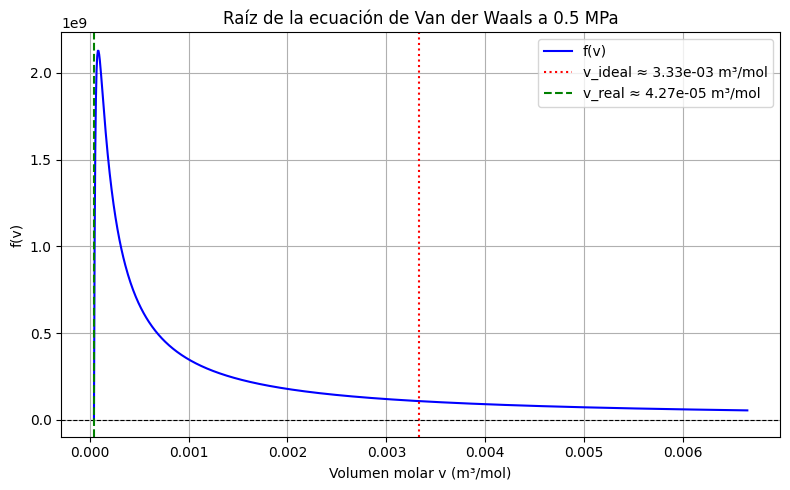

In [12]:
# Asegurar que v_real sea tipo float
if v_brentq is not None:
    v_real = float(v_brentq) # type: ignore

    # Rango para graficar
    v_vals = np.linspace(b_vdw * 1.001, v_ideal * 2, 1000)
    f_vals = [van_der_waals_eq(v, P, T) for v in v_vals]

    # Gráfico
    plt.figure(figsize=(8, 5))
    plt.plot(v_vals, f_vals, label='f(v)', color='blue')
    plt.axhline(0, color='k', linestyle='--', linewidth=0.8)

    # Marcar volumen ideal y real
    plt.axvline(v_ideal, color='red', linestyle=':', label=f'v_ideal ≈ {v_ideal:.2e} m³/mol')
    plt.axvline(v_real, color='green', linestyle='--', label=f'v_real ≈ {v_real:.2e} m³/mol')

    plt.xlabel('Volumen molar v (m³/mol)')
    plt.ylabel('f(v)')
    plt.title('Raíz de la ecuación de Van der Waals a 0.5 MPa')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("No se puede graficar: no se obtuvo una raíz válida con Brentq.")


Zoom local en la raiz 

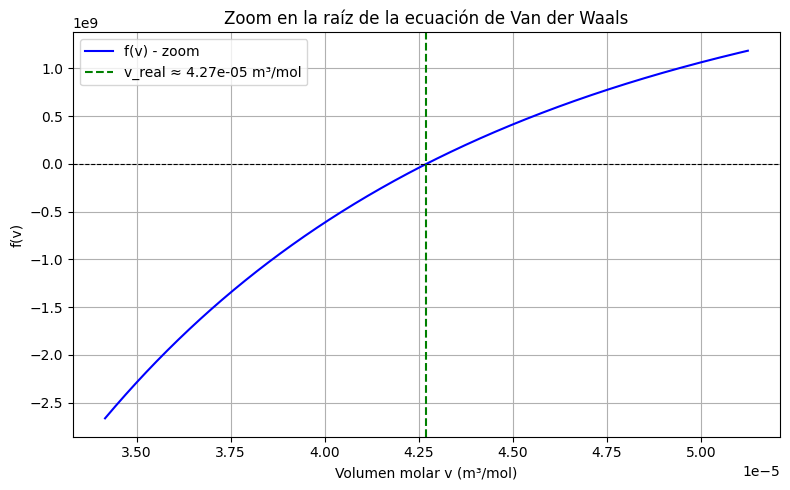

In [13]:
if v_brentq is not None:
    v_real = float(v_brentq) # type: ignore

    # Zoom: 20% alrededor del valor real encontrado
    delta = v_real * 0.2
    v_zoom_vals = np.linspace(v_real - delta, v_real + delta, 1000)
    f_zoom_vals = [van_der_waals_eq(v, P, T) for v in v_zoom_vals]

    plt.figure(figsize=(8, 5))
    plt.plot(v_zoom_vals, f_zoom_vals, label='f(v) - zoom', color='blue')
    plt.axhline(0, color='k', linestyle='--', linewidth=0.8)
    plt.axvline(v_real, color='green', linestyle='--', label=f'v_real ≈ {v_real:.2e} m³/mol')

    plt.xlabel('Volumen molar v (m³/mol)')
    plt.ylabel('f(v)')
    plt.title('Zoom en la raíz de la ecuación de Van der Waals')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("No se puede graficar el zoom: no se obtuvo una raíz válida.")
